# Práctico 1

## Librerías

<img src="https://numpy.org/images/content_images/ds-landscape.png" width=600 alt='Image from numpy website.'>

In [ ]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from google.colab import drive, files
import io

## Carga y preparación de los datos

In [ ]:
# Carga de los datos (desde drive)
drive.mount('/content/drive', force_remount=True)

df=pd.read_csv("/content/drive/My Drive/data/credit_data.csv", sep = ",")

Mounted at /content/drive


In [ ]:
# Otra forma de carga de datos (desde local)
uploaded = files.upload()

Saving credit_data.csv to credit_data.csv


In [ ]:
# Comando desde consola para ver que tengo en esta sesión
!dir

credit_data.csv  drive	sample_data


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['credit_data.csv']))

In [ ]:
# Tipo de objeto creado
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Número de filas en el data frame
len(df)

1000

In [ ]:
# Número de filas y columnas en el data frame
df.shape

(1000, 10)

In [ ]:
# Visualización del data frame
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,1,own,NaN,little,1169,6,domestic appliances,good
1,22,female,1,own,little,moderate,5951,48,domestic appliances,bad
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good
3,45,male,1,for free,little,little,7882,42,radio/television,good
4,53,male,1,for free,little,little,4870,24,car (new),bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,3,own,little,NaN,1736,12,radio/television,good
996,40,male,0,own,little,little,3857,30,car (used),good
997,38,male,1,own,little,NaN,804,12,domestic appliances,good
998,23,male,1,for free,little,little,1845,45,domestic appliances,bad


In [ ]:
# Primeras filas del data frame
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,1,own,NaN,little,1169,6,domestic appliances,good
1,22,female,1,own,little,moderate,5951,48,domestic appliances,bad
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good
3,45,male,1,for free,little,little,7882,42,radio/television,good
4,53,male,1,for free,little,little,4870,24,car (new),bad


In [ ]:
# Ultimas filas del data frame
df.tail(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
997,38,male,1,own,little,NaN,804,12,domestic appliances,good
998,23,male,1,for free,little,little,1845,45,domestic appliances,bad
999,27,male,1,own,moderate,moderate,4576,45,car (used),good


In [ ]:
# Selección de filas con index 2, 3 y 4
df.iloc[2:4]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good
3,45,male,1,for free,little,little,7882,42,radio/television,good
4,53,male,1,for free,little,little,4870,24,car (new),bad


In [ ]:
# Seleccion de filas con identificador 42,43,44, y 45
df.loc[42:45]

In [ ]:
# Selección de filas con index par, lambda expression
df.loc[lambda x: x.index % 2 == 0]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,1,own,NaN,little,1169,6,domestic appliances,good
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good
4,53,male,1,for free,little,little,4870,24,car (new),bad
6,53,male,1,own,quite rich,NaN,2835,24,radio/television,good
8,61,male,3,own,rich,NaN,3059,12,domestic appliances,good
...,...,...,...,...,...,...,...,...,...,...
990,37,male,3,own,NaN,NaN,3565,12,(vacation - does not exist?),good
992,23,male,3,rent,NaN,little,1936,18,domestic appliances,good
994,50,male,1,own,NaN,NaN,2390,12,car (new),good
996,40,male,0,own,little,little,3857,30,car (used),good


In [ ]:
# Selección de columnas por el nombre
df[['Age','Risk']]

,Age,Risk
0,67,good
1,22,bad
2,49,good
3,45,good
4,53,bad
...,...,...
995,31,good
996,40,good
997,38,good
998,23,bad


In [ ]:
# Identificamos las variables del data frame y sus caracteristicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
# Porcentaje de valores nulos
df.isnull().mean()

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
Risk                0.000
dtype: float64

In [ ]:
# En este caso, nos interesa mantenerlos, pero podríamos:

# Reemplazar valores nulos númericos
##df['Age'] = df['Age'].fillna(df['Age'].mean())

# Reemplazar valores nulos categóricos
##df['Saving accounts'] = df['Saving accounts'].fillna(value="nuevo valor")

# Eliminar valores nulos por completo
##df = df.dropna(how='any',axis=0) 

In [ ]:
# Conversión variable categórica
df['Job'] = df['Job'].astype('str')

In [ ]:
# Nuevas variables
df['Credit per year'] = df['Credit amount'] / df['Duration']

In [ ]:
df['Older than 40'] = df['Age'] > 40

In [ ]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit per year,Older than 40
0,67,male,1,own,NaN,little,1169,6,domestic appliances,good,194.833333,True
1,22,female,1,own,little,moderate,5951,48,domestic appliances,bad,123.979167,False
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good,174.666667,True
3,45,male,1,for free,little,little,7882,42,radio/television,good,187.666667,True
4,53,male,1,for free,little,little,4870,24,car (new),bad,202.916667,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,3,own,little,NaN,1736,12,radio/television,good,144.666667,False
996,40,male,0,own,little,little,3857,30,car (used),good,128.566667,False
997,38,male,1,own,little,NaN,804,12,domestic appliances,good,67.000000,False
998,23,male,1,for free,little,little,1845,45,domestic appliances,bad,41.000000,False


## Análisis exploratorio de los datos y estadísticas

In [ ]:
# Estadísticas descriptivas
# Media, desviación estandar, quartiles
df['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

### Análisis univariado

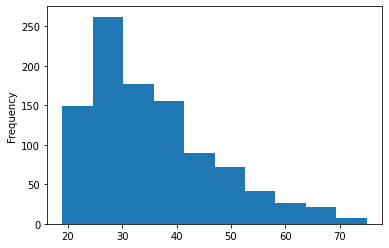

In [ ]:
# Histograma 
df['Age'].plot.hist()

In [ ]:
# Selección de filas en base a condición 
df.loc[df['Age'] > 35]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit per year,Older than 40
0,67,male,1,own,NaN,little,1169,6,domestic appliances,good,194.833333,True
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good,174.666667,True
3,45,male,1,for free,little,little,7882,42,radio/television,good,187.666667,True
4,53,male,1,for free,little,little,4870,24,car (new),bad,202.916667,True
6,53,male,1,own,quite rich,NaN,2835,24,radio/television,good,118.125000,True
...,...,...,...,...,...,...,...,...,...,...,...,...
989,48,male,3,own,little,moderate,1743,24,domestic appliances,good,72.625000,True
990,37,male,3,own,NaN,NaN,3565,12,(vacation - does not exist?),good,297.083333,False
994,50,male,1,own,NaN,NaN,2390,12,car (new),good,199.166667,True
996,40,male,0,own,little,little,3857,30,car (used),good,128.566667,False


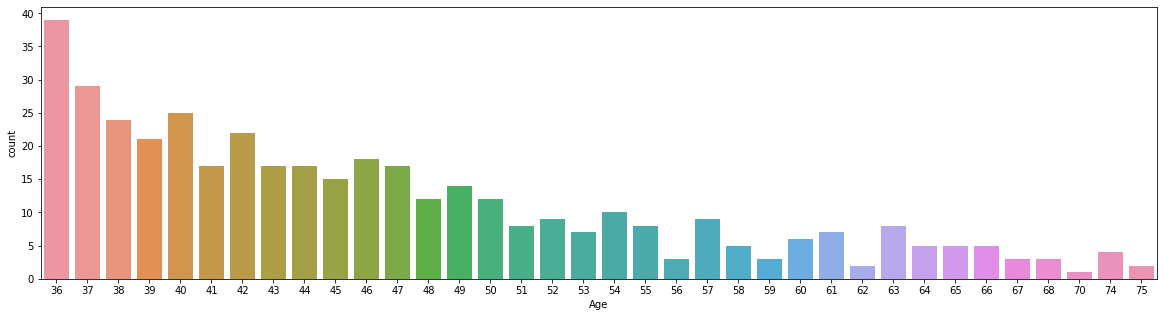

In [ ]:
#Countplot por edad considerando el data frame condicionado
plt.figure(figsize=(20,5))
sns.countplot(data=df.loc[df['Age'] > 35], x='Age')

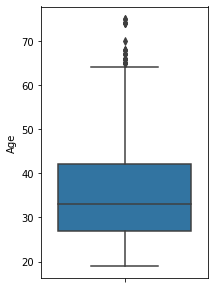

In [ ]:
#Boxplot por edad
plt.figure(figsize=(3,5))
sns.boxplot(y = 'Age', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


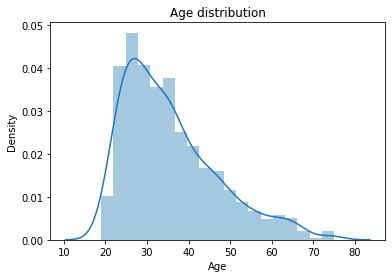

In [ ]:
# Distribución de la edad
sns.distplot(df["Age"])
plt.title("Age distribution");

In [ ]:
# Valores únicos de las variables categoricas
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [ ]:
# Frecuencia de los valores de las variables categóricas
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

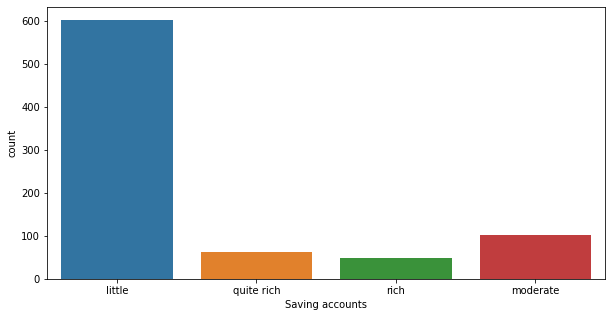

In [ ]:
# Plot de frecuencia
plt.figure(figsize=(10,5))
chart = sns.countplot(data=df, x='Saving accounts')

In [ ]:
# Media
df["Age"].mean()

35.546

In [ ]:
# Mediana
df["Age"].median()

33.0

In [ ]:
# Varianza
df["Age"].var()

129.40128528528504

In [ ]:
# Desviación estandar
df["Age"].std()

11.375468574317502

### Análisis bivariado

In [ ]:
# Tabla de frecuencia cruzada
pd.crosstab(df['Saving accounts'], df.Risk)

Risk,bad,good
Saving accounts,,
little,217,386
moderate,34,69
quite rich,11,52
rich,6,42


In [ ]:
# Tabla de frecuencia normalizada, toda la tabla suma 1
pd.crosstab(df['Saving accounts'], df['Risk'], margins=True, normalize=True)

Risk,bad,good,All
Saving accounts,,,
little,0.265606,0.472460,0.738066
moderate,0.041616,0.084455,0.126071
quite rich,0.013464,0.063647,0.077111
rich,0.007344,0.051408,0.058752
All,0.328029,0.671971,1.000000


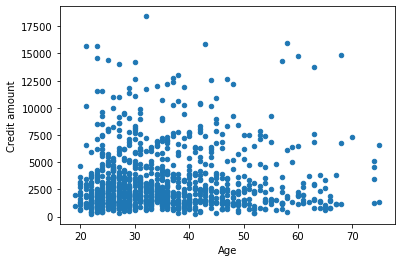

In [ ]:
# Scatter plot
df.plot.scatter(x='Age',y='Credit amount')

In [ ]:
# Media de edad agrupado por propósito
df.groupby('Purpose')['Age'].mean().sort_values(ascending=False)

Purpose
furniture/equipment             39.916667
(vacation - does not exist?)    38.940000
education                       38.545455
car (used)                      37.252427
car (new)                       37.089744
business                        35.484536
domestic appliances             34.700000
retraining                      34.666667
repairs                         34.250000
radio/television                32.458564
Name: Age, dtype: float64

In [ ]:
# Estadísticas de edad según propósito
df.groupby('Purpose')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Purpose,,,,,,,,
(vacation - does not exist?),50.0,38.940000,12.103988,23.0,30.25,36.0,48.50,67.0
business,97.0,35.484536,11.401858,21.0,27.00,33.0,39.00,74.0
car (new),234.0,37.089744,11.515452,20.0,28.00,35.0,43.00,75.0
car (used),103.0,37.252427,12.006304,20.0,28.00,35.0,44.00,75.0
domestic appliances,280.0,34.700000,11.142736,20.0,26.00,32.0,40.25,67.0
education,22.0,38.545455,14.879603,22.0,25.50,33.5,48.00,67.0
furniture/equipment,12.0,39.916667,11.325421,27.0,30.50,39.5,45.00,60.0
radio/television,181.0,32.458564,9.747632,19.0,25.00,30.0,39.00,63.0
repairs,12.0,34.250000,13.376540,22.0,24.00,28.0,39.50,62.0


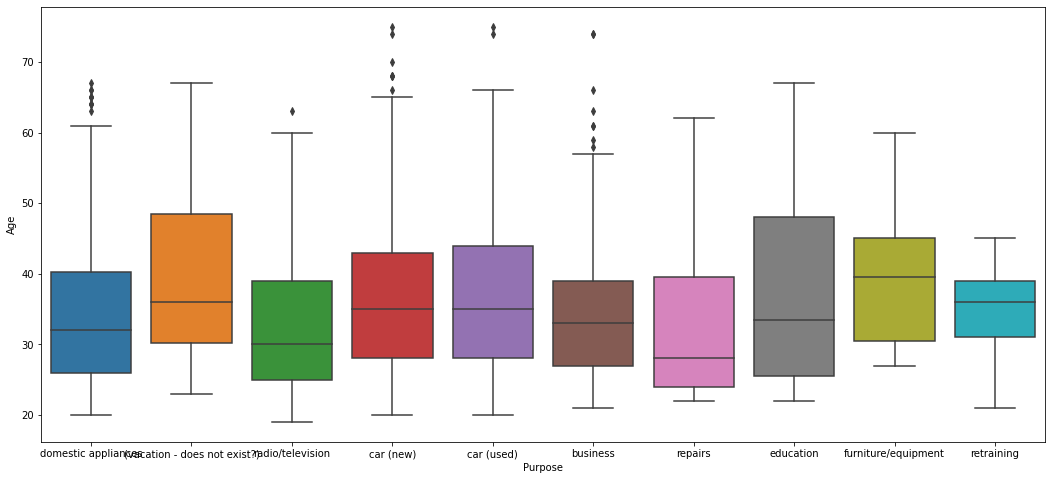

In [ ]:
# Boxplot de edad para cada propósito
plt.figure(figsize=(18,8))
sns.boxplot(y = 'Age', x = 'Purpose', data = df)

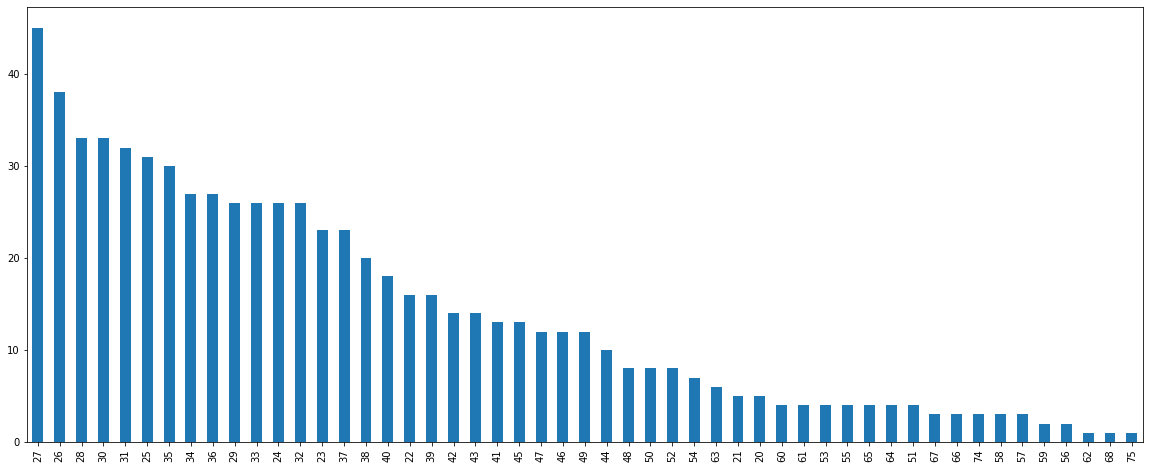

In [ ]:
# Plot de edad para los que tienen casa propia
plt.figure(figsize=(20,8))
chart = df[df['Housing'] == 'own']['Age'].value_counts().plot(kind='bar')

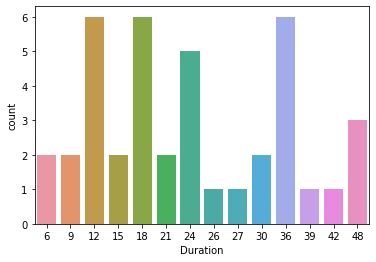

In [ ]:
# Plot de duración para los de edad 30 
sns.countplot(data=df[df['Age'] == 30], x='Duration')

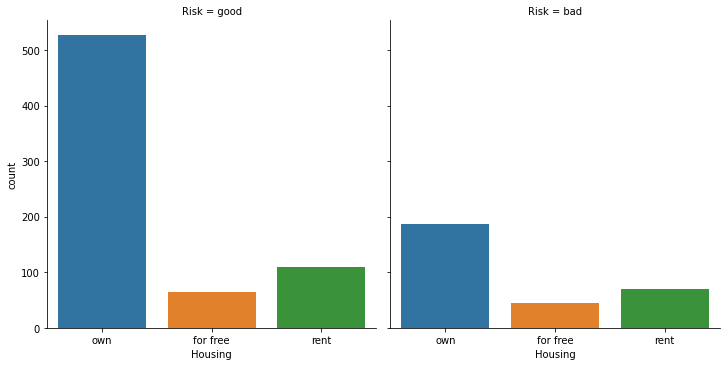

In [ ]:
# Plot de Housing según riesgo
sns.catplot(x="Housing", col="Risk",data= df,kind="count")

### Análisis multivariado

In [ ]:
# Cálculo media según housing
a=df.groupby('Housing').mean()
a

,Age,Credit amount,Duration,Credit per year,Older than 40
Housing,,,,,
for free,43.814815,4906.212963,27.453704,192.566092,0.546296
own,35.593268,3060.939691,20.328191,162.291174,0.262272
rent,30.368715,3122.553073,19.240223,174.169135,0.156425


In [ ]:
# Calculo mediana segun housing
b=df.groupby('Housing').median()
b

,Age,Credit amount,Duration,Credit per year,Older than 40
Housing,,,,,
for free,42.0,3800.5,24.0,146.906250,True
own,33.0,2238.0,18.0,125.500000,False
rent,26.0,2301.0,18.0,145.733333,False


In [ ]:
# Combinamos dos data frames
ab=pd.merge(a.Age,b.Age, how='inner',on='Housing')
ab

,Age_x,Age_y
Housing,,
for free,43.814815,42.0
own,35.593268,33.0
rent,30.368715,26.0


In [ ]:
# Renombramos variables
ab=ab.rename(columns={'Age_x': 'Age_mean', 'Age_y': 'Age_median'})
ab

,Age_mean,Age_median
Housing,,
for free,43.814815,42.0
own,35.593268,33.0
rent,30.368715,26.0


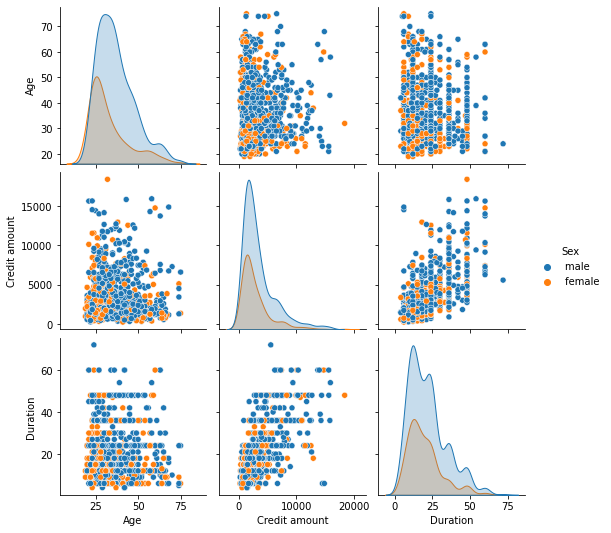

In [ ]:
# Pairplot 
sns.pairplot(df[['Age','Credit amount','Duration','Sex']], hue='Sex', height=2.5);

### Sampling

#### Simple random Sample

In [ ]:
# Con cantidad
df.sample(n=4, random_state=1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit per year,Older than 40,Duration2
507,34,male,0,own,moderate,moderate,6850,15,car (new),bad,456.666667,False,15
818,43,male,0,own,little,little,15857,36,furniture/equipment,good,440.472222,True,36
452,34,male,1,own,little,NaN,2759,12,radio/television,good,229.916667,False,12
368,42,male,1,own,little,little,3446,36,radio/television,bad,95.722222,True,36


In [ ]:
# Porcentual
df.sample(frac=0.01, random_state=1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit per year,Older than 40,Duration2
507,34,male,0,own,moderate,moderate,6850,15,car (new),bad,456.666667,False,15
818,43,male,0,own,little,little,15857,36,furniture/equipment,good,440.472222,True,36
452,34,male,1,own,little,NaN,2759,12,radio/television,good,229.916667,False,12
368,42,male,1,own,little,little,3446,36,radio/television,bad,95.722222,True,36
242,24,male,1,for free,little,little,4605,48,car (used),bad,95.937500,False,48
929,43,male,3,own,little,little,1344,12,car (new),good,112.000000,True,12
262,36,male,0,for free,little,little,5302,18,car (new),good,294.555556,False,18
810,26,male,1,own,little,moderate,907,8,business,good,113.375000,False,8
318,32,male,1,own,little,NaN,701,12,(vacation - does not exist?),good,58.416667,False,12
49,28,female,1,own,moderate,NaN,2073,12,domestic appliances,good,172.750000,False,12


#### Stratified Sample

In [ ]:
## Sampling con representación 2 de cada clase (2 es un N cualquiera)
df.groupby('Risk', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit per year,Older than 40,Duration2
500,27,female,1,own,little,little,3123,24,car (new),bad,130.125000,False,24
180,28,male,1,own,little,NaN,9572,36,business,bad,265.888889,False,36
725,41,female,3,own,rich,NaN,250,6,car (new),good,41.666667,True,6
868,37,male,1,own,NaN,NaN,7409,36,business,good,205.805556,False,36


In [ ]:
# Sampling en base a ocurrencia de Risk, mantiene proporciones
# Agrupo por riesgo, para cada uno, aplico lambda expression
# La cantidad de samples por riesgo, está dado por su probabilidad de ocurrencia len(x)/len(df)
# Se representa proporcionalmente Risk en 3 ejemplos (3 es un N cualquiera)
# Uso round y no int porque int me recorta el decimal
df.groupby('Risk', group_keys=False).apply(lambda x: x.sample(round(3*len(x)/len(df))))

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit per year,Older than 40,Duration2
375,37,female,1,rent,little,little,7685,48,business,bad,160.104167,False,48
995,31,female,3,own,little,NaN,1736,12,radio/television,good,144.666667,False,12
461,36,male,1,own,little,little,1721,15,car (new),good,114.733333,False,15


### Outliers

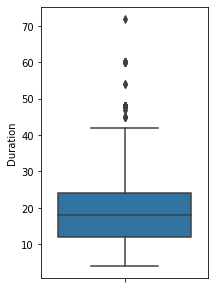

In [ ]:
#Boxplot por duración
plt.figure(figsize=(3,5))
sns.boxplot(y = 'Duration', data = df)

In [ ]:
# Winsorize para eliminar outliers de duración
df['Duration2'] = winsorize(df['Duration'], limits=[None, 0.05])

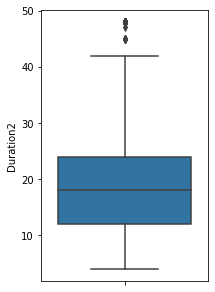

In [ ]:
#Boxplot por duración luego de winsorize
plt.figure(figsize=(3,5))
sns.boxplot(y = 'Duration2', data = df)

In [ ]:
df[['Duration','Duration2']].mean()

Duration     20.903
Duration2    20.711
dtype: float64

In [ ]:
df[['Duration','Duration2']].std()

Duration     12.058814
Duration2    11.508254
dtype: float64

In [ ]:
df[['Duration','Duration2']].max()

Duration     72
Duration2    48
dtype: int64

## Ejercicios

### Cargue el dataset houses_data.csv

In [ ]:
drive.mount('/content/drive', force_remount=True)

df_houses=pd.read_csv("/content/drive/My Drive/data/houses_data.csv", sep = ",")

### ¿Cuantas observaciones tiene el dataset?

### ¿Que campos tiene el dataset?

### Crear nuevo df seleccionando columnas bedrooms, bathrooms, square_footage_living, floors, waterfront, condition, square_footage_above, square_footage_basement, year_built, year_renovated, price

In [ ]:
new_df_houses = df_houses[['bedrooms', 'bathrooms', 'square_footage_living', 'floors', 'waterfront', 'condition', 'square_footage_above', 'square_footage_basement', 'year_built', 'year_renovated', 'price']].copy()

### Observar tipo de datos y realizar las modificaciones que crea adecuadas

### Cree una nueva columna booleana llamada 'was_renewed' que indique true si y solo si la casa fue renovada en algún momento

### Grafique la distribución de bedrooms

### ¿Cuales son los valores de bedrooms y la frecuencia de cada uno?

### Grafique mediante un boxplot price

### ¿Cual es la media de price? ¿Qué pasa con la mediana, por qué? ¿Y la desviación estándar?

### Ajuste los valores atípicos (outliers) de price considerando el 5% superior y vuelva a revisar la media, ¿se acerca a la mediana?

### Gráfique mediante un scatter plot la relación entre bedrooms y bathrooms

### ¿Cuantas casas renovadas tienen 3 bedrooms?
Puede ayudarse mediante una tabla de frecuencia 

### Calcule la media de bedrooms por was_renewed

### Realice un sampling de 250 ejemplos respetando la distribución de bedrooms

### Vuelva a graficar mediante boxplot el precio para el sampling anterior
Compare estos valores con el boxplot de los datos completos